### IS Proof of concept - DRMABS

In [25]:
import matplotlib.pyplot as plt
import networkx as nx
import operator
import numpy as np
import seaborn as sns
import pandas as pd
import scipy
import itertools
import requests

In [2]:
import nltk
from nltk import bigrams
import collections

In [3]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [4]:
import pythainlp
from pythainlp import word_tokenize, Tokenizer
from pythainlp.corpus.common import thai_words
from pythainlp import sent_tokenize
from pythainlp.corpus import thai_stopwords

In [5]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [6]:
from selenium import webdriver

Web scraping

In [33]:
url = 'https://pantip.com/topic/33377805'
driver = webdriver.Chrome(executable_path='selenium/chromedriver.exe')
driver.get(url)
content=driver.page_source
soup=BeautifulSoup(content,'lxml')

In [34]:
#topic = soup.find("h2",{"class":"display-post-title"})
#topic.text

In [35]:
textList = []
# ใช้ class_ เพื่อดึง div class จำเพาะ เพื่อไม่ให้ข้อความอื่นที่ไม่ต้องการปนมา
for div in soup.find_all("div", class_=lambda value: value and value=="display-post-story"):
    if len(str(div.text).strip()) > 1:
        textList.append(str(div.text).strip())

In [36]:
driver.quit()

Clean data & NLP Tokenized

In [12]:
def checkStopwords(w):
    returnList = []
    stopwords = list(thai_stopwords())
    for i in w:  # comment
        if i not in stopwords:
            returnList.append(i)
    return returnList

In [13]:
corpus = []

words = set(thai_words())  # thai_words() returns frozenset
words.add("ซีพี")
words.add("เมจิ")
words.add("สตอเบอรี่")  # Isaac
words.add("ช็อกโกแล็ต")
words.add("คอนเฟล็ก")
words.add("dairy home")
words.add("พาสเจอร์ไรซ์")
words.add("ดัชมิลล์selected")
words.add('grass fed milk')
custom_tokenizer = Tokenizer(words)

# เอาข้อคำถามออก
del textList[0]

for ii in textList:
    #wtkn = sent_tokenize(ii, engine="whitespace+newline")
    wtkn = custom_tokenizer.word_tokenize(ii)
    wtkn = [x for x in wtkn if x not in ['',' ','\n','\t','-','+','(',')','.','..','\t\t\t\t\t\t','\xa0\xa0',':']]
    wtkn = [y.strip('.') for y in wtkn]
    wtkn = [s for s in wtkn if not s.isdigit()]
    corpus.append(wtkn)

In [14]:
# Merge list
merge_corpus_list = list(itertools.chain.from_iterable(corpus))

In [15]:
chk_corpus_list = checkStopwords(merge_corpus_list)

In [16]:
# Make unique
set_unique_list = set(chk_corpus_list)                         
unique_corpus = list(set_unique_list)

สร้าง Co-occurence matrix with biGram

In [18]:
bigrm = list(bigrams(chk_corpus_list))

In [19]:
bigrm_cnt = dict(collections.Counter(bigrm))

In [20]:
bigrm_cnt

{('ขวด', 'สวย'): 1,
 ('สวย', 'ชวน'): 1,
 ('ชวน', 'ดื่ม'): 1,
 ('ดื่ม', 'รสชาติ'): 1,
 ('รสชาติ', 'รู้สึก'): 1,
 ('รู้สึก', 'นม'): 1,
 ('นม', 'รส'): 1,
 ('รส', 'หวาน'): 2,
 ('หวาน', 'รสชาติ'): 1,
 ('รสชาติ', 'อร่อย'): 1,
 ('อร่อย', 'นม'): 1,
 ('นม', 'ยี่ห้อ'): 1,
 ('ยี่ห้อ', 'ลอง'): 1,
 ('ลอง', 'ยี่ห้อ'): 2,
 ('ยี่ห้อ', 'เมจิ'): 2,
 ('เมจิ', 'อร่อย'): 1,
 ('อร่อย', 'ชอบ'): 2,
 ('ชอบ', 'รสจืด'): 1,
 ('รสจืด', 'นม'): 1,
 ('นม', 'นม'): 1,
 ('นม', 'อร่อย'): 2,
 ('ชอบ', 'รส'): 3,
 ('หวาน', 'หวาน'): 1,
 ('หวาน', 'กำลังดี'): 2,
 ('กำลังดี', 'แพคเกจ'): 1,
 ('แพคเกจ', 'สวย'): 1,
 ('สวย', 'ฝา'): 1,
 ('ฝา', 'ยังมี'): 1,
 ('ยังมี', 'ซีล'): 1,
 ('ซีล', 'กระดาษ'): 1,
 ('กระดาษ', 'ฟอยล์'): 1,
 ('ฟอยล์', 'ชั้น'): 1,
 ('ชั้น', 'ยี่ห้อ'): 1,
 ('ยี่ห้อ', 'ฝา'): 1,
 ('ฝา', 'กิน'): 1,
 ('กิน', 'หา'): 1,
 ('หา', 'ซื้อ'): 1,
 ('ซื้อ', 'ลูก'): 2,
 ('ลูก', 'นม'): 1,
 ('อร่อย', 'ดี'): 3,
 ('ดี', 'ชอบ'): 1,
 ('ชอบ', 'กิน'): 1,
 ('กิน', 'นม'): 1,
 ('นม', 'กล้วย'): 1,
 ('กล้วย', 'เซเว่น'): 1,
 ('เซเว่น', 'ซีพี'): 1

In [21]:
bigram_df = pd.DataFrame()
bigram_df = bigram_df.append(bigrm_cnt, ignore_index=True).fillna(0)

In [22]:
bigram_df.T.head(10)

,0
"(ขวด, สวย)",1.0
"(สวย, ชวน)",1.0
"(ชวน, ดื่ม)",1.0
"(ดื่ม, รสชาติ)",1.0
"(รสชาติ, รู้สึก)",1.0
"(รู้สึก, นม)",1.0
"(นม, รส)",1.0
"(รส, หวาน)",2.0
"(หวาน, รสชาติ)",1.0
"(รสชาติ, อร่อย)",1.0


สร้างกราฟ

In [23]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in bigrm_cnt.items():
    G.add_edge(k[0], k[1], weight=(v * 10))

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


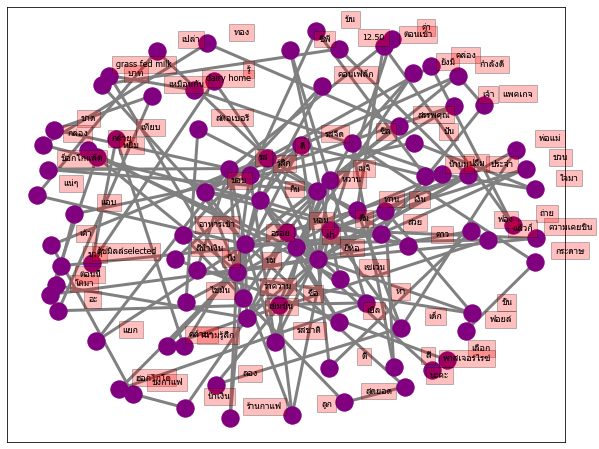

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))
pos = nx.spring_layout(G, k=2)
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center',fontname='Tahoma', fontsize=9)

plt.show()

ค้นหา Community detection